In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

df = pd.read_csv('/content/drive/MyDrive/MSDS 597/Data/athlete_events.csv')
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [12]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [15]:
df2 = df[df['NOC'] == 'USA']
df2['Height'].mean()

176.88690315619098

In [16]:
sum(pd.isna(df2["Height"]))

4025

Let's compare whether the mean height of Olympic athletes from another country differ from the United States. Suppose for the Netherlands our data is corrupted, and we have just a random sample of Olympic athletes rather than the whole population.



In [ ]:
df_sample = df[df['Team'] == 'Netherlands'].sample(frac=0.005)
df_sample.head()

This sets up the Hypothesis Test:

H
0
:
μ
NED
=
176
H
a
:
μ
NED
≠
176
We know that means drawn from random samples are normally distributed by the Central Limit Theorem. By the Null Hypothesis we assume that this is a normal distribution has mean 176. Note that this is the mean of the distribution of the random variable 
X
 where 
X
 is the mean of a random sample of Dutch Olympic athlete heights. Let's set a significance level of 
α
=
0.05
.

In [20]:
sample_mean = df_sample['Height'].mean()
sample_mean

182.0


How unusual is this result? Is it far enough away from the assumed fact to reject the Null Hypothesis?

We estimate the standard deviation of this distribution to be 
σ
m
=
σ
sample
√
n
. This is also known as the standard eror.

In [22]:
import scipy.stats
std_error = scipy.stats.sem(df_sample['Height'], nan_policy='omit')
std_error

2.609372248149306

In [ ]:
ndst = np.random.normal(pop_mean, std_error, 100000)

plt.hist(ndst, bins=30, density=True)

# vertical line
plt.axvline(x=sample_mean, color='red')
plt.show()

In [ ]:
#z-score
z = (sample_mean - pop_mean) / (std_error)
z

In [ ]:
# this function gives the area under the standard normal distribution
# to the left of the z value given
def p_left_of_z(z):
    return scipy.stats.norm(0, 1).cdf(z)

ndst = np.random.normal(0, 1, 100000)
plt.hist(ndst, bins=30, density=True)

# In this plot we want the area to the left of left-most red line
# and the right of the right-most red line
plt.axvline(x=-z, color='red')
plt.axvline(x=z, color='red')
plt.show()

In [ ]:
# since the distribution is symmetric we can just find
# 2 times the area left of the left-most red line
p = 2*p_of_z(-z)
p


In [25]:
conf_lvl = 0.95
deg_of_freedom = len(df_sample) - 1

confidence_interval = scipy.stats.t.interval(conf_lvl, deg_of_freedom, sample_mean, std_error)
confidence_interval

(176.65494325128864, 187.34505674871136)

LINEAR REGRESSION


In [26]:

## Linear Regression

#%%

# fuel efficiency dataset
#df_cars = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv')

import seaborn as sns
df_cars = sns.load_dataset('mpg')

df_cars.dropna(inplace=True)


In [4]:
df_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Which variables might have a linear relationship? Which definitely do not?

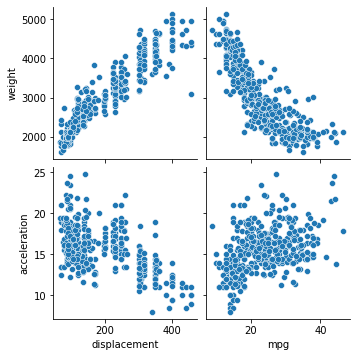

In [30]:
sns.pairplot(df_cars,
             x_vars = ['displacement', 'mpg'],
             y_vars= ['weight', 'acceleration'])

In [ ]:
!pip install matplotlib==3.5

In [44]:
plt.scatter(x=df_cars['weight'], y=df_cars['horsepower'])

# pick out two random points
idx1 = np.random.randint(low=1, high=len(df_cars)+1, size=1)
idx2 = np.random.randint(low=1, high=len(df_cars)+1, size=1)

# use .item() to get just the value not a Series object
x1 = df_cars.loc[idx1, 'weight'].item()
y1 = df_cars.loc[idx1, 'horsepower'].item()
x2 = df_cars.loc[idx2, 'weight'].item()
y2 = df_cars.loc[idx2, 'horsepower'].item()plt.scatter(x=df_cars['weight'], y=df_cars['horsepower'])

# pick out two random points
idx1 = np.random.randint(low=1, high=len(df_cars)+1, size=1)
idx2 = np.random.randint(low=1, high=len(df_cars)+1, size=1)

# use .item() to get just the value not a Series object
x1 = df_cars.loc[idx1, 'weight'].item()
y1 = df_cars.loc[idx1, 'horsepower'].item()
x2 = df_cars.loc[idx2, 'weight'].item()
y2 = df_cars.loc[idx2, 'horsepower'].item()

plt.axline((x1, y1), (x2, y2), color='green')

plt.show()

SyntaxError: ignored

How can we decide how "well" a line fits our data? How about a particular datapoint?


AttributeError: ignored

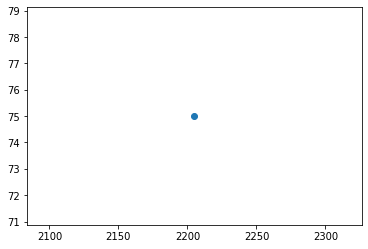

In [40]:
# another random point
idx3 = np.random.randint(low=1, high=len(df_cars)+1, size=1)

# use .item() to get just the value not a Series object
x3 = df_cars.loc[idx3, 'weight'].item()
y3 = df_cars.loc[idx3, 'horsepower'].item()

plt.scatter(x=x3, y=y3)

plt.axline((x1, y1), (x2, y2), color='green')
plt.show()


In [46]:
# the error for this particular line

def y_pred_line(x, m, b):
    return m*x+b
    
m = (y2 - y1) / (x2 - x1)
b = y1 - m * x1

# zip lets us loop over two iterables
sq_errors = []
for x, y in zip(df_cars['weight'], df_cars['horsepower']):
    sq_errors.append((y_pred_line(x, m, b) - y)**2)

RSS = sum(sq_errors)
RSS

NameError: ignored

In [45]:
MSE = RSS / len(df_cars)
MSE

NameError: ignored

In [47]:

import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [48]:
model = ols(formula = 'horsepower ~ weight', data=df_cars)

In [49]:
# fit the model after creating it
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             horsepower   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1154.
Date:                Tue, 01 Feb 2022   Prob (F-statistic):          1.36e-118
Time:                        05:09:40   Log-Likelihood:                -1717.0
No. Observations:                 392   AIC:                             3438.
Df Residuals:                     390   BIC:                             3446.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.1835      3.570     -3.412      0.001     -19.203      -5.164
weight         0.0392      0.001     33.972      0.000       0.037       0.041
==============================================================================
Omnibus:                       83.255   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.937
Skew:                           0.892   Prob(JB):                     1.11e-68
Kurtosis:                       6.997   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

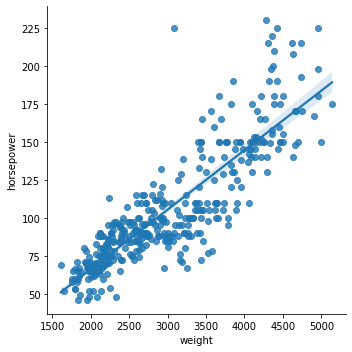

In [50]:
# seaborn also calculates and plots the linear regression line from OLS
# the shaded region is a 95% confidence interval
import seaborn as sns
sns.lmplot(x='weight',y='horsepower',data=df_cars)


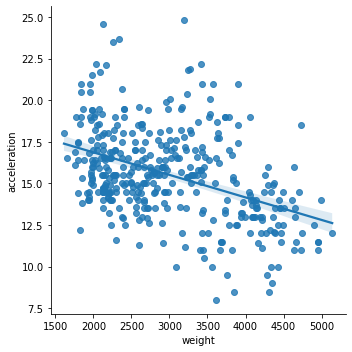

In [51]:
import seaborn as sns
sns.lmplot(x='weight',y='acceleration',data=df_cars)


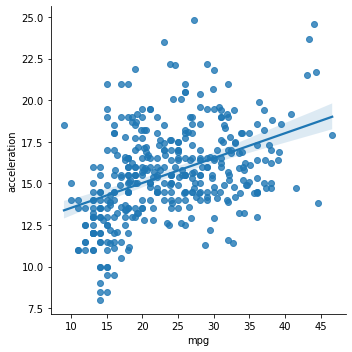

In [52]:
import seaborn as sns
sns.lmplot(x='mpg',y='acceleration',data=df_cars)
